In [2]:
import polars as pl
import gzip
import shutil
import matplotlib.pyplot as plt
import datetime
import pandas as pd

# Data Prep and Cleaning

In [3]:
# csv_fp = 'crime.csv'
# gz_fp = 'data/crime.csv.gz'

# with open(csv_fp, 'rb') as f_in:
#     with gzip.open(gz_fp, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [4]:
data = pd.read_csv('data/crime.csv.gz')
data.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                             BIKE - STOLEN  ...     IC   Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   Invest Cont   
4                         THEFT OF IDENTITY  ...     IC   Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    510.0    998.0       NaN      NaN   
1    330.0    998.0       NaN      NaN   
2    480.0      NaN       NaN      NaN   
3    343.0      NaN       NaN      NaN   
4    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [5]:
data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
data = data.rename(columns={'DATE OCC': 'date_occured',
                    'Date Rptd': 'date_reported',
                    'TIME OCC': 'time_occured',
                    'Premis Cd': 'premis_code',
                    'Premis Desc': 'premis_description',
                    'Weapon Used Cd': 'weapon_code',
                    'Weapon Desc': 'weapon_description',
                    'Crm Cd': 'crime_code',
                    'Crm Cd Desc': 'crime_description',
                    'Vict Age': "victim_age",
                    'Vict Sex': 'victim_sex',
                    'Vict Descent': 'victim_race',
                    'Crm Cd 1': 'crime_code_1',
                    'Crm Cd 2': 'crime_code_2',
                    'Crm Cd 3': 'crime_code_3',
                    'Crm Cd 4': 'crime_code_4',
                    'Status Desc': 'status_descriptions',
                    'Rpt Dist No': 'district_number',
                    'Mocodes' : 'mo_codes'
                            })

In [7]:
data['victim_race'] = data['victim_race'].fillna('X')

In [8]:
map_race = {'A': 'Other Asian',
            'B' : 'Black',
            'C' : 'Chinese',
            'D' : 'Cambodian',
            'F' : 'Filipino',
            'G' : 'Guamanian',
            'H' : 'Hispanic', 
            'I' : 'American Indian',
            'J' : 'Japanese',
            'K' : 'Korean',
            'L' : 'Laotian',
            'O' : 'Other',
            'P' : 'Pacific Islander', 
            'S' : 'Samoan', 
            'U' : 'Hawaiian',
            'V' : 'Vietnamese',
            'W' : 'White',
            'X' : 'Unknown',
            'Z' : 'Asian Indian'
}
data['victim_race'] = data['victim_race'].map(map_race)

In [9]:
data['mo_codes'] = data['mo_codes'].str.split(' ')

In [10]:
data.head()

DR_NO           date_reported            date_occured  time_occured  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM          2130   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM          1800   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM          1700   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM          2037   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM          1200   

   AREA  AREA NAME  district_number  Part 1-2  crime_code  \
0     7   Wilshire              784         1         510   
1     1    Central              182         1         330   
2     3  Southwest              356         1         480   
3     9   Van Nuys              964         1         343   
4     6  Hollywood              666         2         354   

                          crime_description  ... Status  status_descriptions  \
0                          VEHICLE - STOLEN  ...     AA         Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC          Invest Cont   
2                             BIKE - STOLEN  ...     IC          Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC          Invest Cont   
4                         THEFT OF IDENTITY  ...     IC          Invest Cont   

  crime_code_1 crime_code_2  crime_code_3 crime_code_4  \
0        510.0        998.0           NaN          NaN   
1        330.0        998.0           NaN          NaN   
2        480.0          NaN           NaN          NaN   
3        343.0          NaN           NaN          NaN   
4        354.0          NaN           NaN          NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [11]:
data.loc[data['crime_code_1'].isna(), 'crime_code_1'] = data[data['crime_code_1'].isna()]['crime_code_2']

In [12]:
data['crime_code_2'] = data['crime_code_2'].fillna(0)
data['crime_code_3'] = data['crime_code_3'].fillna(0)
data['crime_code_4'] = data['crime_code_4'].fillna(0)
data['weapon_code'] = data['weapon_code'].fillna(0)

In [13]:
data['time_occured'] = data['time_occured'].astype(str).str.zfill(4).astype(int)

In [14]:
data['year_occured'] = pd.to_datetime(data['date_occured'], format='mixed').dt.year
data['month_year_occured'] = pd.to_datetime(data['date_occured'], format='mixed').dt.to_period('M')
data['hour_occured'] = data['time_occured'] // 100

# Exploratory Data Analysis (EDA)

In [15]:
from datetime import time

In [16]:
crime_by_precinct = data.groupby('AREA NAME')['DR_NO'].count().sort_values(ascending=False)
crime_by_race = data.groupby('victim_race')['DR_NO'].count().sort_values(ascending=False)
crime_by_gender = data.groupby('victim_sex')['DR_NO'].count().sort_values(ascending=False)
crime_by_year = data.groupby('year_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_month_year = data.groupby('month_year_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_hour = data.groupby('hour_occured')['DR_NO'].count().sort_index(ascending=True)
crime_by_type = data.groupby('crime_code')['DR_NO'].count().sort_values(ascending=False)

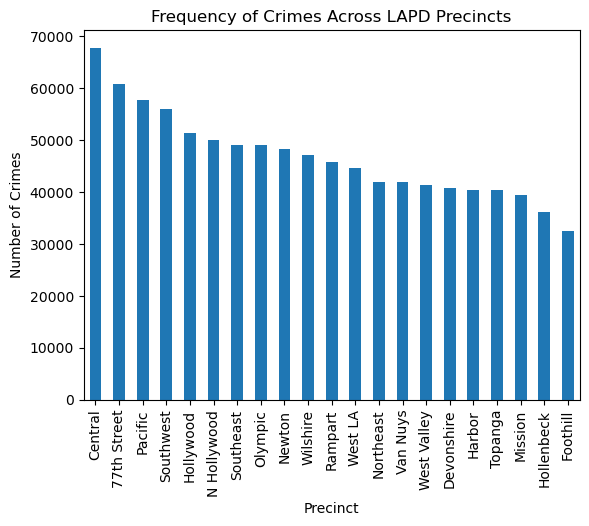

In [17]:
crime_by_precinct.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across LAPD Precincts')
plt.ylabel('Number of Crimes')
plt.xlabel('Precinct')
plt.show()

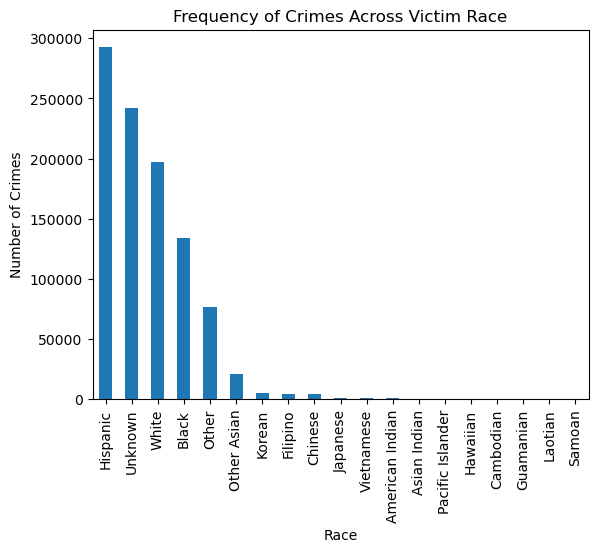

In [18]:
crime_by_race.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Victim Race')
plt.ylabel('Number of Crimes')
plt.xlabel('Race')
plt.show()

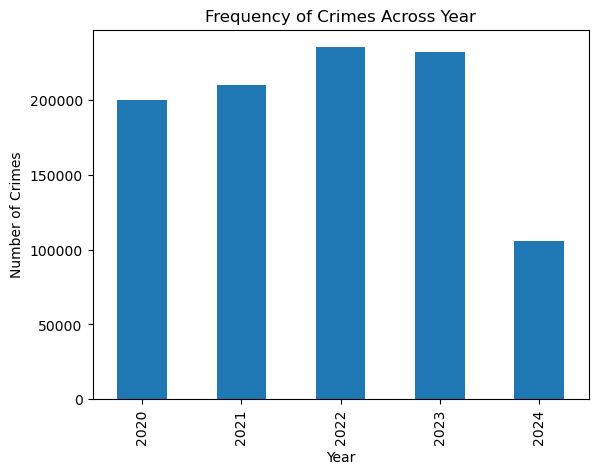

In [19]:
crime_by_year.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Year')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

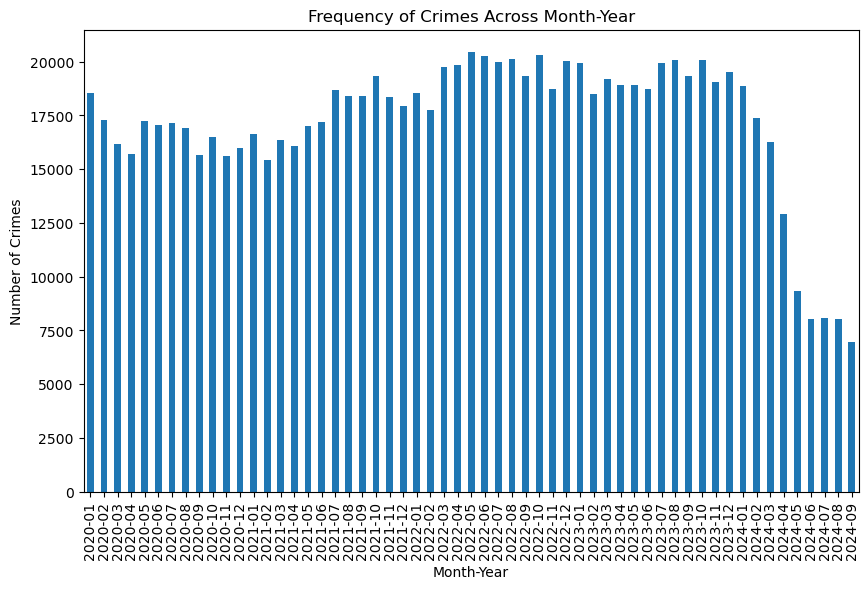

In [20]:
plt.figure(figsize=(10,6))
crime_by_month_year.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Month-Year')
plt.ylabel('Number of Crimes')
plt.xlabel('Month-Year')
plt.show()

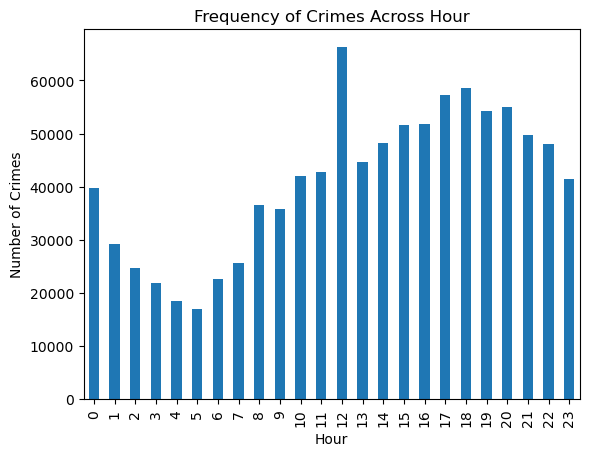

In [21]:
crime_by_hour.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Hour')
plt.show()

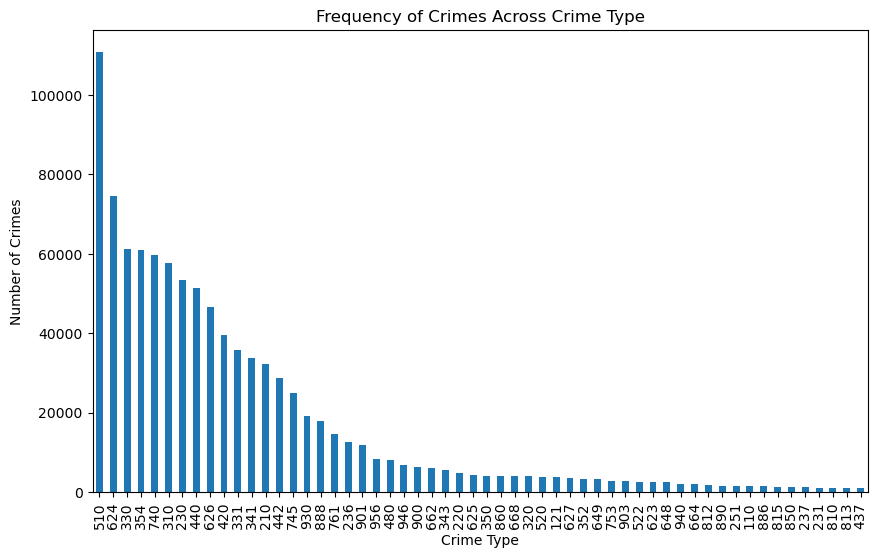

In [22]:
plt.figure(figsize=(10,6))
relevant_crimes = crime_by_type[crime_by_type.values > 1000]
relevant_crimes.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes Across Crime Type')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.show()

In [23]:
data['crime_description'].value_counts()

crime_description
VEHICLE - STOLEN                                           110804
BATTERY - SIMPLE ASSAULT                                    74688
BURGLARY FROM VEHICLE                                       61324
THEFT OF IDENTITY                                           60867
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59639
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64

# What Happened? & KNN Imputation

In [24]:
#pip install PyPDF2

In [25]:
import PyPDF2
import re

In [26]:
with open('data/mo_codes.pdf', 'rb') as f:
    reader = PyPDF2.PdfReader(f)
    text = ''
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text += page.extract_text()


In [27]:
pattern = r'(\d{4})\s+(.*)'
matches = re.findall(pattern, text)
code_dict = {code: (description.replace('MO CODES', '')
                    .replace('SUSPICIOUS ACTIVITY', "")
                    .replace('TRAFFIC COLLISION', "")
                    .replace('(CAD USE ONLY)', "")
                    .replace('(SAR USE ONLY)', '')
                    .strip()) for code, description in matches}

In [28]:
def code_to_activity(code):
    if len(code) > 4:
        code_list = code.split(' ')
        associated_incidents = ''
        for code in code_list:
            associated_incidents += code_dict[code] + ' & '
    else:
        return code_dict[code]
    return associated_incidents.strip()[:-1].strip()

In [29]:
data.columns

Index(['DR_NO', 'date_reported', 'date_occured', 'time_occured', 'AREA',
       'AREA NAME', 'district_number', 'Part 1-2', 'crime_code',
       'crime_description', 'mo_codes', 'victim_age', 'victim_sex',
       'victim_race', 'premis_code', 'premis_description', 'weapon_code',
       'weapon_description', 'Status', 'status_descriptions', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'LOCATION',
       'Cross Street', 'LAT', 'LON', 'year_occured', 'month_year_occured',
       'hour_occured'],
      dtype='object')

In [30]:
subset = data[['crime_code', 'date_occured', 'time_occured', 'AREA', 'district_number', 'victim_age', 'mo_codes', 'victim_sex', 'victim_race',
               'premis_code', 'weapon_code', 'LAT', 'LON']]
subset.head()

crime_code            date_occured  time_occured  AREA  district_number  \
0         510  03/01/2020 12:00:00 AM          2130     7              784   
1         330  02/08/2020 12:00:00 AM          1800     1              182   
2         480  11/04/2020 12:00:00 AM          1700     3              356   
3         343  03/10/2020 12:00:00 AM          2037     9              964   
4         354  08/17/2020 12:00:00 AM          1200     6              666   

   victim_age                  mo_codes victim_sex victim_race  premis_code  \
0           0                       NaN          M       Other        101.0   
1          47        [1822, 1402, 0344]          M       Other        128.0   
2          19              [0344, 1251]          X     Unknown        502.0   
3          19              [0325, 1501]          M       Other        405.0   
4          28  [1822, 1501, 0930, 2004]          M    Hispanic        102.0   

   weapon_code      LAT       LON  
0          0.0  34.0375 -118.3506  
1          0.0  34.0444 -118.2628  
2          0.0  34.0210 -118.3002  
3          0.0  34.1576 -118.4387  
4          0.0  34.0944 -118.3277

In [31]:
subset['mo_codes'].isna().value_counts(normalize=True)


mo_codes
False    0.852171
True     0.147829
Name: proportion, dtype: float64

In [32]:
missing_num = subset['mo_codes'].isna().value_counts().iloc[1]
missing_num

145262

In [33]:
import numpy as np

In [34]:
subset.loc[:, 'mo_codes'] = subset['mo_codes'].apply(lambda x: [] if type(x) == float else x)
subset['mo_codes']

0                                           []
1                           [1822, 1402, 0344]
2                                 [0344, 1251]
3                                 [0325, 1501]
4                     [1822, 1501, 0930, 2004]
                          ...                 
982633                            [0344, 1822]
982634                                      []
982635                      [0329, 0400, 0416]
982636    [1822, 0334, 0416, 0445, 0449, 1202]
982637                                      []
Name: mo_codes, Length: 982638, dtype: object

In [35]:
subset_notna = subset[subset['mo_codes'].apply(lambda x: len(x) > 0)]['mo_codes']
subset_notna

1                           [1822, 1402, 0344]
2                                 [0344, 1251]
3                                 [0325, 1501]
4                     [1822, 1501, 0930, 2004]
5                     [1822, 0100, 0930, 0929]
                          ...                 
982631                                  [0385]
982632    [2047, 0400, 0429, 0444, 1202, 1822]
982633                            [0344, 1822]
982635                      [0329, 0400, 0416]
982636    [1822, 0334, 0416, 0445, 0449, 1202]
Name: mo_codes, Length: 837376, dtype: object

In [36]:
subset = pl.from_pandas(subset)
subset_notna = pl.from_pandas(subset_notna)

In [37]:
code_samp = np.random.choice(subset_notna, size=missing_num)
code_samp

array([array(['0361', '0913', '0319', '0416', '0447'], dtype=object),
       array(['0100', '0928'], dtype=object),
       array(['0945', '0325', '1822', '0416'], dtype=object), ...,
       array(['1822', '0416', '0418', '0342'], dtype=object),
       array(['0400', '0448', '0913', '0603', '1810', '0444'], dtype=object),
       array(['0325', '0202', '0216', '2028', '0334', '0378', '1822', '2004'],
             dtype=object)                                                    ],
      dtype=object)

In [38]:
subset = subset.to_pandas()

In [39]:
subset.loc[subset['mo_codes'].apply(lambda x: len(x) == 0),'mo_codes'] = code_samp

In [40]:
subset.head()

crime_code            date_occured  time_occured  AREA  district_number  \
0         510  03/01/2020 12:00:00 AM          2130     7              784   
1         330  02/08/2020 12:00:00 AM          1800     1              182   
2         480  11/04/2020 12:00:00 AM          1700     3              356   
3         343  03/10/2020 12:00:00 AM          2037     9              964   
4         354  08/17/2020 12:00:00 AM          1200     6              666   

   victim_age                        mo_codes victim_sex victim_race  \
0           0  [0361, 0913, 0319, 0416, 0447]          M       Other   
1          47              [1822, 1402, 0344]          M       Other   
2          19                    [0344, 1251]          X     Unknown   
3          19                    [0325, 1501]          M       Other   
4          28        [1822, 1501, 0930, 2004]          M    Hispanic   

   premis_code  weapon_code      LAT       LON  
0        101.0          0.0  34.0375 -118.3506  
1        128.0          0.0  34.0444 -118.2628  
2        502.0          0.0  34.0210 -118.3002  
3        405.0          0.0  34.1576 -118.4387  
4        102.0          0.0  34.0944 -118.3277

# Age Imputation

In [41]:
non_zero_age = subset[subset['victim_age'] > 0]['victim_age']
zero_age = subset[subset['victim_age'] <= 0]
zero_age_len = len(zero_age)
non_zero_samp = np.random.choice(non_zero_age, size=zero_age_len, replace=True)
non_zero_samp

array([45, 21, 43, ..., 30, 57, 70])

In [42]:
subset.loc[subset['victim_age'] <= 0, 'victim_age'] = non_zero_samp

# Gender Imputation

In [43]:
non_nan_sex = subset[subset['victim_sex'].isna() == False]['victim_sex']
nan_sex = subset[subset['victim_sex'].isna()]
nan_sex_len = len(nan_sex)
non_nan_samp = np.random.choice(non_nan_sex, size=nan_sex_len, replace=True)
non_nan_samp

array(['F', 'M', 'M', ..., 'M', 'F', 'X'], dtype=object)

In [44]:
subset.loc[subset['victim_sex'].isna(), 'victim_sex'] = non_nan_samp

# Machine Learning

In [45]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

### Categorical Encoding

In [46]:
subset_ml = subset.copy()

### Encoding for Mo Codes

In [47]:
import hashlib

In [48]:
subset_ml['mo_codes_hashed'] = subset_ml['mo_codes'].apply(lambda x: int(hashlib.sha256(str(x).encode('utf-8')).hexdigest(), 16) % 10**8)

### Date Cleaning / Categorical Encoding

In [49]:
subset_ml['date_occured'] = pd.to_datetime(subset_ml['date_occured'], format='mixed')
subset_ml['year'] = subset_ml['date_occured'].dt.year
subset_ml['month'] = subset_ml['date_occured'].dt.month
subset_ml['day'] = subset_ml['date_occured'].dt.day
subset_ml = subset_ml.drop(columns=['date_occured'])

In [50]:
subset_ml['crime_code'] = subset_ml['crime_code'].astype('category')
subset_ml['AREA'] = subset_ml['AREA'].astype('category')
subset_ml['district_number'] = subset_ml['district_number'].astype('category')
subset_ml['victim_sex'] = subset_ml['victim_sex'].astype('category')
subset_ml['victim_race'] = subset_ml['victim_race'].astype('category')
subset_ml['premis_code'] = subset_ml['premis_code'].astype('category')
subset_ml['weapon_code'] = subset_ml['weapon_code'].astype('category')
subset_ml['mo_codes_hashed'] = subset_ml['mo_codes_hashed'].astype('category')
subset_ml['year'] = subset_ml['year'].astype('category')
subset_ml['month'] = subset_ml['month'].astype('category')
subset_ml['day'] = subset_ml['day'].astype('category')

In [51]:
subset_ml = subset_ml.dropna()

# Classification Algorithm

# LightGBM

In [52]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [53]:
X = subset_ml.drop(columns=['crime_code', 'mo_codes', 'LAT', 'LON'])
y = subset_ml['crime_code']

In [54]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2)

In [56]:
categorical_features = list((X_train.dtypes == 'category').index)

In [57]:
train_dat = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_dat = lgb.Dataset(X_test, label=y_test, reference=train_dat, categorical_feature=categorical_features, free_raw_data=False)

In [58]:
import os
os.environ["OMP_NUM_THREADS"] = "8"


In [59]:
params ={
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(le.classes_),
    'num_leaves': 200,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'max_depth': 20,
    'min_data_in_leaf': 30,
    'bagging_fraction': 0.9,
    'bagging_freq': 5
}

In [60]:
params['lambda_l1'] = 0.1
params['lambda_l2'] = 0.1
params['is_unbalance'] = True

In [61]:
from sklearn.model_selection import StratifiedKFold


all_scores = []
best_model = None
best_score = float('inf')


kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, val_idx in kf.split(X, y_encoded):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    bst = lgb.train(params, train_data, valid_sets=[val_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

    y_val_pred = bst.predict(X_val, num_iternation=bst.best_iteration)
    y_val_pred_labels = y_val_pred.argmax(axis=1)
    score = accuracy_score(y_val, y_val_pred_labels)

    all_scores.append(score)
    if score < best_score:
        best_score = score
        best_model = bst
    

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7402
[LightGBM] [Info] Number of data points in the train set: 786097, number of used features: 12
[LightGBM] [Info] Start training from score -6.442338
[LightGBM] [Info] Start training from score -11.783076
[LightGBM] [Info] Start training from score -5.572811
[LightGBM] [Info] Start training from score -8.033572
[LightGBM] [Info] Start training from score -3.418568
[LightGBM] [Info] Start training from score -5.315119
[LightGBM] [Info] Start training from score -2.912507
[LightGBM] [Info] Start training from score -6.820231
[LightGBM] [Info] Start training from score -7

In [62]:
best_score

0.6193950866051984

In [68]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

# Predict on the test set
y_test_pred = best_model.predict(X_test, num_iteration=best_model.best_iteration)
y_test_pred_labels = y_test_pred.argmax(axis=1)

# Calculate recall
recall = recall_score(y_test, y_test_pred_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred_labels, average='weighted')


recall, f1

(0.7547538481109274, 0.7408525271156998)